CIC Working Group - Analyze The Pandemic Response Project

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import random
from pandasql import sqldf

In [4]:
%%cmd
pwd
cd data
ls -la

REM cd ../HSB/data
REM this cell is a place holder to execute OS commands that may be beneficial to the work. 
REM %%cmd must be on 1st line

Microsoft Windows [Version 10.0.22621.3007]
(c) Microsoft Corporation. All rights reserved.

E:\Jupyter\notebooks\CIC-Working-Group>pwd
/e/Jupyter/notebooks/CIC-Working-Group

E:\Jupyter\notebooks\CIC-Working-Group>cd data

E:\Jupyter\notebooks\CIC-Working-Group\data>ls -la
total 464088
drwxr-xr-x 1 rolan rolan        0 Feb  2 15:04 .
drwxr-xr-x 1 rolan rolan        0 Feb  3 12:42 ..
-rw-r--r-- 1 rolan rolan 43837034 Jun 26  2023 OxCGRT_compact_national_v1.csv
-rw-r--r-- 1 rolan rolan 43108990 Jun 26  2023 OxCGRT_compact_subnational_v1.csv
-rw-r--r-- 1 rolan rolan 41587971 Jun 26  2023 OxCGRT_fullwithnotes_national_2020_v1.csv
-rw-r--r-- 1 rolan rolan 61244326 Jun 26  2023 OxCGRT_fullwithnotes_national_2021_v1.csv
-rw-r--r-- 1 rolan rolan 53987455 Jun 26  2023 OxCGRT_fullwithnotes_national_2022_v1.csv
-rw-r--r-- 1 rolan rolan 64323312 Jun 26  2023 OxCGRT_simplified_v1.csv
-rw-r--r-- 1 rolan rolan 70864360 Jun 26  2023 OxCGRT_vaccines_full_national_v1.csv
-rw-r--r-- 1 rolan rolan 962359

In [4]:
# read data and examine data types
path = 'E:/Jupyter/notebooks/CIC-Working-Group/data/'
fname = 'OxCGRT_compact_national_v1.csv'
full_name = path + fname
Covid_nat_df = pd.read_csv(full_name)
print('Covid_nat_df: ',Covid_nat_df.shape)
print(Covid_nat_df.columns, len(Covid_nat_df.columns))
Covid_nat_df[1:5]

Covid_nat_df:  (202760, 56)
Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Ava

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [5]:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
Covid_nat_df['Date'] = Covid_nat_df['Date'].astype('str') 
Covid_nat_df['Date'] = pd.to_datetime(Covid_nat_df['Date'], format='mixed', errors='coerce')
Covid_nat_df['Date'].describe()

# Covid_df

count                           202760
mean     2021-07-01 11:59:59.999999744
min                2020-01-01 00:00:00
25%                2020-09-30 18:00:00
50%                2021-07-01 12:00:00
75%                2022-04-01 06:00:00
max                2022-12-31 00:00:00
Name: Date, dtype: object

In [7]:
# https://www.statology.org/pandas-check-if-column-contains-string/

Covid_nat_df.loc[(Covid_nat_df['Date'] == '20200102') & (Covid_nat_df['CountryName'].str.contains('United States'))]
#Covid_df[Covid_df['CountryName'].str.contains('United States')]

# .str.contains('partial_string').any()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
191801,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0,0.0,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
195089,United States Virgin Islands,VIR,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [8]:
# read data and examine data types
path = 'E:/Jupyter/notebooks/CIC-Working-Group/data/'
fname2 = 'OxCGRT_compact_subnational_v1.csv'
full_name2 = path + fname2
Covid_subnat_df = pd.read_csv(full_name2)
print('Covid_subnat_df: ',Covid_subnat_df.shape)
print(Covid_subnat_df.columns)
Covid_subnat_df[1:5]

C:\Users\rolan\AppData\Local\Temp\ipykernel_33688\2825093794.py:5: DtypeWarning: Columns (4,5,53) have mixed types. Specify dtype option on import or set low_memory=False.
  Covid_subnat_df = pd.read_csv(full_name2)


Covid_subnat_df:  (239661, 58)
Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'CityName',
       'CityCode', 'Jurisdiction', 'Date', 'C1M_School.closing', 'C1M_Flag',
       'C2M_Workplace.closing', 'C2M_Flag', 'C3M_Cancel.public.events',
       'C3M_Flag', 'C4M_Restrictions.on.gatherings', 'C4M_Flag',
       'C5M_Close.public.transport', 'C5M_Flag',
       'C6M_Stay.at.home.requirements', 'C6M_Flag',
       'C7M_Restrictions.on.internal.movement', 'C7M_Flag',
       'C8EV_International.travel.controls', 'E1_Income.support', 'E1_Flag',
       'E2_Debt.contract.relief', 'E3_Fiscal.measures',
       'E4_International.support', 'H1_Public.information.campaigns',
       'H1_Flag', 'H2_Testing.policy', 'H3_Contact.tracing',
       'H4_Emergency.investment.in.healthcare', 'H5_Investment.in.vaccines',
       'H6M_Facial.Coverings', 'H6M_Flag', 'H7_Vaccination.policy', 'H7_Flag',
       'H8M_Protection.of.elderly.people', 'H8M_Flag',
       'V1_Vaccine.Prioritisation..summary

,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,C1M_School.closing,C1M_Flag,...,V3_Vaccine.Financial.Support..summary.,V4_Mandatory.Vaccination..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
1,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200102,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
2,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200103,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
3,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200104,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
4,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200105,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0


In [157]:
# https://www.statology.org/pandas-check-if-column-contains-string/
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
Covid_subnat_df['Date'] = Covid_subnat_df['Date'].astype('str')
Covid_subnat_df['Date'] = pd.to_datetime(Covid_subnat_df['Date'], format='mixed', errors='coerce')
print(Covid_subnat_df['Date'].describe())

Covid_State_df = (Covid_subnat_df.loc[(Covid_subnat_df['Jurisdiction'] == 'STATE_TOTAL') &
                     (Covid_subnat_df['CountryName'].str.contains('United States'))])
Covid_State_df = (Covid_State_df.loc[:,['CountryName','RegionName','Jurisdiction','Date', 
                                        'C1M_School.closing', 'H6M_Facial.Coverings', 'H7_Vaccination.policy', 
                                        'ConfirmedCases', 'ConfirmedDeaths', 'MajorityVaccinated', 
                                        'PopulationVaccinated', 'StringencyIndex_Average', 
                                        'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average', 'EconomicSupportIndex']]) 
Covid_State_df.rename(columns={'RegionName': 'State',
                                'C1M_School.closing': 'C1M_School_Closing', 
                               'H6M_Facial.Coverings': "H6M_Facial_Coverings", 
                               "H7_Vaccination.policy": "H7_Vaccination_Policy"}, inplace=True)
Covid_State_df[1:10]

count                           239661
mean     2021-07-05 21:46:26.961582848
min                2020-01-01 00:00:00
25%                2020-10-03 00:00:00
50%                2021-07-06 00:00:00
75%                2022-04-08 00:00:00
max                2023-02-28 00:00:00
Name: Date, dtype: object


,CountryName,State,Jurisdiction,Date,C1M_School_Closing,H6M_Facial_Coverings,H7_Vaccination_Policy,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
183766,United States,Alaska,STATE_TOTAL,2020-01-02,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183767,United States,Alaska,STATE_TOTAL,2020-01-03,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183768,United States,Alaska,STATE_TOTAL,2020-01-04,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183769,United States,Alaska,STATE_TOTAL,2020-01-05,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183770,United States,Alaska,STATE_TOTAL,2020-01-06,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183771,United States,Alaska,STATE_TOTAL,2020-01-07,0,0,0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
183772,United States,Alaska,STATE_TOTAL,2020-01-08,0,0,0,0.0,0.0,NV,0,5.56,3.12,3.57,0.0
183773,United States,Alaska,STATE_TOTAL,2020-01-09,0,0,0,0.0,0.0,NV,0,5.56,3.12,3.57,0.0
183774,United States,Alaska,STATE_TOTAL,2020-01-10,0,0,0,0.0,0.0,NV,0,5.56,3.12,3.57,0.0


In [130]:
my_categories=pd.CategoricalDtype(categories=['0', '1', '2', '3', '4', '5'], ordered=True)
Covid_subnat_df["C1M_School.closing"] = Covid_subnat_df["C1M_School.closing"].astype('str')
Covid_subnat_df["H6M_Facial.Coverings"] = Covid_subnat_df["H6M_Facial.Coverings"].astype('str')
Covid_subnat_df["H7_Vaccination.policy"] = Covid_subnat_df["H7_Vaccination.policy"].astype('str')
Covid_State_df["C1M_School_Closing"] = Covid_State_df["C1M_School_Closing"].astype(my_categories)
Covid_State_df['H6M_Facial_Coverings'] = Covid_State_df["H6M_Facial_Coverings"].astype(my_categories)
Covid_State_df['H7_Vaccination_Policy'] = Covid_State_df["H7_Vaccination_Policy"].astype(my_categories)                                          
Covid_State_df.describe()

,Date,ConfirmedCases,ConfirmedDeaths,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,55896,5.589600e+04,55896.000000,55896.000000,55896.000000,55896.000000,55896.000000
mean,2021-07-01 12:00:00.000000256,8.315163e+05,11366.754365,38.030010,45.861239,47.153127,36.816812
min,2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-30 18:00:00,6.513300e+04,1122.000000,22.570000,37.090000,39.570000,25.000000
50%,2021-07-01 12:00:00,3.272040e+05,4930.000000,30.990000,45.110000,46.140000,37.500000
75%,2022-04-01 06:00:00,9.805090e+05,14468.250000,54.630000,56.940000,58.040000,50.000000
max,2022-12-31 00:00:00,1.183509e+07,98544.000000,93.520000,80.210000,82.260000,100.000000
std,NaN,1.386286e+06,16735.459137,20.169775,15.340887,14.782686,25.236937


In [158]:
print(len(Covid_State_df))
Covid_State_df.isnull().sum()

55896


CountryName                        0
State                              0
Jurisdiction                       0
Date                               0
C1M_School_Closing                 0
H6M_Facial_Coverings               0
H7_Vaccination_Policy              0
ConfirmedCases                     0
ConfirmedDeaths                    0
MajorityVaccinated                 0
PopulationVaccinated               0
StringencyIndex_Average            0
GovernmentResponseIndex_Average    0
ContainmentHealthIndex_Average     0
EconomicSupportIndex               0
dtype: int64

<ins>Examining School Policy Predictors</ins>

<ins>Policy Indicators</ins>    
Policy Indicators have name flags that identfiy who they apply to:

E = Everyone
NV = Non-vaccinated
V = vaccinated
M = Majority

These columns are indicators with numerical values with specific values per indicator.  

|    Indicator        |  Category      | Range    | Meaning  | 
| --------------------|----------------|----------|----------|
|C1M-School Closing   |  Containments  | 0 - 3    | None, Procedure Change, Some Schools, All |
|                     |                |          |                                           |
|H6M-Facial Coverings |  Health System | 0 - 4    | None, Recommended,                        | 
|                     |                |          | Required for Some Shared Spaces,          |
|                     |                |          | Reguired for All Shared Spaces,           |
|                     |                |          | Required All Outside of Home Spaces       |

Majority Vaccinated            

Population Vaccinated

<ins>Policy Summary Indices<\ins>
    
Government Respisne Index
    
Stringency Index
    
Economic Support Index




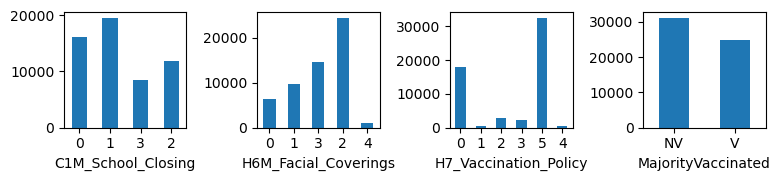

In [159]:
# Examine Categortical Data 
# https://www.statology.org/plot-categorical-data-in-pandas/
# https://stackoverflow.com/questions/19602864/how-to-plot-in-a-specific-axis-with-dataframe-histby-in-pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm 
categ_colnames = ['C1M_School_Closing', 'H6M_Facial_Coverings', 'H7_Vaccination_Policy', 
                    'MajorityVaccinated']
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(8, 2))
figure.tight_layout(pad=2.0)
plots = [ax1, ax2,ax3,ax4]
for count, col in enumerate(categ_colnames):
    Covid_State_df[col].value_counts(sort=False).plot(kind='bar',ax=plots[count], rot=0)

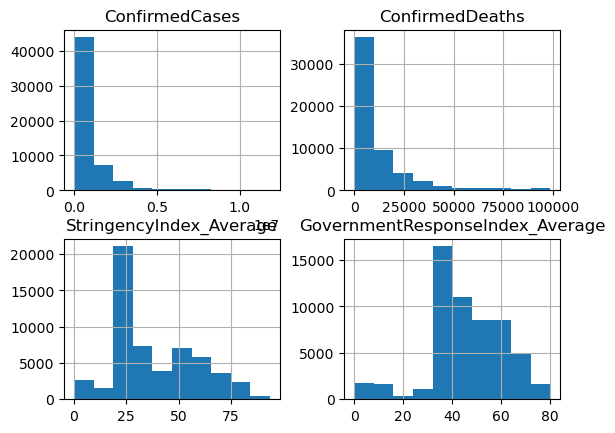

In [160]:
non_ind_colnames = ['ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex_Average', 
                    'GovernmentResponseIndex_Average']

fig = Covid_State_df.hist(column=non_ind_colnames)

In [ ]:
# Using a Jupyter Notebook on Col
# https://stackoverflow.com/questions/48961866/how-to-run-a-downloaded-jupyter-notebook-on-google-colaboratory

In [161]:
# Generate new cases and deaths
# https://stackoverflow.com/questions/23142967/adding-a-column-thats-result-of-difference-in-consecutive-rows-in-pandas
Covid_State_df['New_Cases'] = Covid_State_df['ConfirmedCases'] - Covid_State_df['ConfirmedCases'].shift(+1)
Covid_State_df['New_Deaths'] = Covid_State_df['ConfirmedDeaths'] - Covid_State_df['ConfirmedDeaths'].shift(+1)
Covid_State_df[1000:1005]

,CountryName,State,Jurisdiction,Date,C1M_School_Closing,H6M_Facial_Coverings,H7_Vaccination_Policy,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,New_Cases,New_Deaths
184765,United States,Alaska,STATE_TOTAL,2022-09-27,0,2,5,297562.0,1364.0,V,63.55,22.48,35.82,37.37,25.0,0.0,0.0
184766,United States,Alaska,STATE_TOTAL,2022-09-28,0,2,5,298178.0,1364.0,V,63.63,22.47,35.82,37.37,25.0,616.0,0.0
184767,United States,Alaska,STATE_TOTAL,2022-09-29,0,2,5,298178.0,1364.0,V,63.63,22.47,35.82,37.37,25.0,0.0,0.0
184768,United States,Alaska,STATE_TOTAL,2022-09-30,0,2,5,298178.0,1364.0,V,63.63,22.47,35.82,37.37,25.0,0.0,0.0
184769,United States,Alaska,STATE_TOTAL,2022-10-01,0,2,5,298178.0,1364.0,V,63.63,22.47,35.82,37.37,25.0,0.0,0.0


In [164]:
sql1 = '''SELECT State, Date, ConfirmedCases, New_Cases, ConfirmedDeaths, New_Deaths
                 FROM Covid_State_df
                 WHERE State = 'Florida' AND Date between '2021-01-01' and '2021-02-01';'''
sqldf(sql1)

,State,Date,ConfirmedCases,New_Cases,ConfirmedDeaths,New_Deaths
0,Florida,2021-01-01 00:00:00.000000,1323315.0,0.0,21673.0,0.0
1,Florida,2021-01-02 00:00:00.000000,1354833.0,31518.0,21890.0,217.0
2,Florida,2021-01-03 00:00:00.000000,1365436.0,10603.0,21987.0,97.0
3,Florida,2021-01-04 00:00:00.000000,1376692.0,11256.0,22090.0,103.0
4,Florida,2021-01-05 00:00:00.000000,1392123.0,15431.0,22188.0,98.0
5,Florida,2021-01-06 00:00:00.000000,1409906.0,17783.0,22317.0,129.0
6,Florida,2021-01-07 00:00:00.000000,1429722.0,19816.0,22481.0,164.0
7,Florida,2021-01-08 00:00:00.000000,1449252.0,19530.0,22666.0,185.0
8,Florida,2021-01-09 00:00:00.000000,1464697.0,15445.0,22804.0,138.0
9,Florida,2021-01-10 00:00:00.000000,1477010.0,12313.0,22912.0,108.0


<div class="alert alert-block alert-info">
    <p style="margin-left: 25px;">
    <b><font size="5">Percentages Vs Counts and State Population Totals</font></b></p><br>
    <font size="3">

Percentages do a better job of measuring the impact of a state policy, than the straight case and death counts do. There is a difference if a count represents 1% or 50% of a population. 50% pefcent of a stare population signifies a greater policy failure. 

<ins>Dataset Source<\ins>

https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

<ins>Region Definitions<\ins>

The Northeast region includes the New England division: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont; and the Middle Atlantic division: New Jersey, New York, and Pennsylvania. The Midwest region includes the East North Central division: Illinois, Indiana, Michigan, Ohio, and Wisconsin; and the West North Central division: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota. The South region includes the South Atlantic division: Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia; the East South Central division: Alabama, Kentucky, Mississippi, and Tennessee; and the West South Central division: Arkansas, Louisiana, Oklahoma, and Texas. The West region includes the Mountain division: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming; and the Pacific division: Alaska, California, Hawaii, Oregon, and Washington.
    
</font>
</div> 


In [154]:
# Build State Region Dictionary

state_region_dict = {'Connecticut':['NE','Northeast'], 'Maine':['NE','Northeast'], 
                     'Massachusetts':['NE','Northeast'], 'New Hampshire':['NE','Northeast'], 
                     'Rhode Island':['NE','Northeast'], 'Vermont':['NE','Northeast'],
                     'New Jersey':['MA','Northeast'], 'New York':['MA','Northeast'], 
                     'Pennsylvania':['MA','Northeast'], 'Illinois':['ENC','Midwest'], 
                     'Indiana':['ENC','Midwest'], 'Michigan':['ENC','Midwest'], 'Ohio':['ENC','Midwest'],
                     'Wisconsin':['ENC','Midwest'], 'Iowa':['WNC','Midwest'], 'Kansas':['WNC','Midwest'],
                     'Minnesota':['WNC','Midwest'], 'Missouri':['WNC','Midwest'], 'Nebraska':['WNC','Midwest'],
                     'North Dakota':['WNC','Midwest'], 'South Dakota':['WNC','Midwest'],
                      'Delaware':['SA','South'], 'District of Columbia':['SA','South'], 'Florida':['SA','South'],
                      'Georgia':['SA','South'], 'Maryland':['SA','South'], 'North Carolina':['SA','South'], 
                      'South Carolina':['SA','South'], 'Virginia':['SA','South'], 'West Virginia':['SA','South'],
                       'Alabama':['ESC','South'], 'Kentucky':['ESC','South'], 'Mississippi':['ESC','South'],
                       'Tennessee':['ESC','South'], 'Arkansas':['WSC','South'], 'Louisiana':['WSC','South'],
                       'Oklahoma':['WSC','South'], 'Texas':['WSC','South'], 'Arizona':['M','West'], 
                       'Colorado':['M','West'], 'Idaho':['M','West'], 'Montana':['M','West'], 'Nevada':['M','West'], 
                       'New Mexico':['M','West'], 'Utah':['M','West'], 'Wyoming':['M','West'], 'Alaska':['P','West'],
                       'California':['P','West'], 'Hawaii':['P','West'], 'Oregon':['P','West'], 
                       'Washington':['P','West']}

State_df = pd.DataFrame.from_dict(data=state_region_dict, orient='index')
State_df.reset_index(inplace=True)
State_df.columns = ['State','Region', 'Broad_Region']
State_df[1:5]

,State,Region,Broad_Region
1,Maine,NE,Northeast
2,Massachusetts,NE,Northeast
3,New Hampshire,NE,Northeast
4,Rhode Island,NE,Northeast


In [189]:
# read state population data
# https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html
path = 'E:/Education/CIC-Big-Data-Hub/data/'
fname = 'State-Populations.csv'
full_name = path + fname
State_Pops_df = pd.read_csv(full_name)
print('State_Pops_df: ',State_Pops_df.shape)
State_Pops_df.columns = ['Region', 'Apr_01_2020', 'Jul_01_2020', 'Jul_01_2021', 
                         'Jul_01_2022', 'Jul_01_2023']
print(State_Pops_df.columns, len(State_Pops_df.columns))
# Split Data, so that each row represents a region and a date
sql10 = '''SELECT Region as State, 'Apr-01-2020' as Reported_Date, Apr_01_2020 as Population
                 FROM State_Pops_df
                 Where Region in (Select State from State_df)
                 union
                 SELECT Region as State, 'Jul-01-2020' as Reported_Date, Jul_01_2020 as Population 
                 FROM State_Pops_df
                 Where Region in (Select State from State_df)
                 union
                 SELECT Region as State, 'Jul-01-2021' as Reported_Date, Jul_01_2021 as Population 
                 FROM State_Pops_df
                 Where Region in (Select State from State_df)
                 union
                 SELECT Region as State, 'Jul-01-2022' as Reported_Date, Jul_01_2022 as Population 
                 FROM State_Pops_df
                 Where Region in (Select State from State_df)
                 union
                 SELECT Region as State, 'Jul-01-2023' as Reported_Date, Jul_01_2023 as Population 
                 FROM State_Pops_df
                 Where Region in (Select State from State_df)
                 Order by region, Reported_Date;'''
state_date_pops = sqldf(sql10)
state_date_pops['Reported_Date'] = state_date_pops['Reported_Date'].astype('str')
state_date_pops['Reported_Date'] = pd.to_datetime(state_date_pops['Reported_Date'], format='mixed', errors='coerce')
state_date_pops['Population'] = state_date_pops['Population'].str.replace(',', '').astype('int64')

# df.loc[df['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
state_date_pops.loc[state_date_pops['Reported_Date'].dt.month != 4, 'End_Date'] = state_date_pops['Reported_Date'] + pd.offsets.DateOffset(years=1)
state_date_pops.loc[state_date_pops['Reported_Date'].dt.month == 4, 'End_Date'] = state_date_pops['Reported_Date'] + pd.offsets.DateOffset(months=3)
state_date_pops[100:150]

State_Pops_df:  (57, 6)
Index(['Region', 'Apr_01_2020', 'Jul_01_2020', 'Jul_01_2021', 'Jul_01_2022',
       'Jul_01_2023'],
      dtype='object') 6


,State,Reported_Date,Population,End_Date
100,Maryland,2020-04-01,6177253,2020-07-01
101,Maryland,2020-07-01,6173689,2021-07-01
102,Maryland,2021-07-01,6175045,2022-07-01
103,Maryland,2022-07-01,6163981,2023-07-01
104,Maryland,2023-07-01,6180253,2024-07-01
105,Massachusetts,2020-04-01,7032933,2020-07-01
106,Massachusetts,2020-07-01,6997713,2021-07-01
107,Massachusetts,2021-07-01,6991951,2022-07-01
108,Massachusetts,2022-07-01,6982740,2023-07-01
109,Massachusetts,2023-07-01,7001399,2024-07-01


In [191]:
sql11 = '''SELECT A.State, A.Date, B.Reported_Date, A.C1M_School_Closing, A.H6M_Facial_Coverings, 
                  A.H7_Vaccination_Policy,A.ConfirmedCases, A.ConfirmedDeaths,
                  A.MajorityVaccinated, A.PopulationVaccinated,A.StringencyIndex_Average,
                  A.GovernmentResponseIndex_Average,A.ContainmentHealthIndex_Average,
                  A.EconomicSupportIndex, B.Population, 
                  round((100 * A.ConfirmedCases/B.Population),2) as cpercent,
                  round((100 * A.ConfirmedDeaths/B.Population),2) as dpercent
                  FROM Covid_State_df A INNER JOIN state_date_pops B
                  WHERE date(A.Date) between B.Reported_Date and B.End_Date 
                  AND A.State = B.State
                  Order By dpercent desc, cpercent desc, A.State, A.Date;'''
percent_rows = sqldf(sql11)
percent_rows[1:20]

,State,Date,Reported_Date,C1M_School_Closing,H6M_Facial_Coverings,H7_Vaccination_Policy,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,Population,cpercent,dpercent
1,Mississippi,2022-12-28 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,955145.0,13097.0,V,53.55,27.02,32.91,37.61,0.0,2938928,32.50,0.45
2,Mississippi,2022-12-29 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,955145.0,13097.0,V,53.55,27.02,32.91,37.61,0.0,2938928,32.50,0.45
3,Mississippi,2022-12-30 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,955145.0,13097.0,V,53.55,27.02,32.91,37.61,0.0,2938928,32.50,0.45
4,Mississippi,2022-12-31 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,955145.0,13097.0,V,53.55,27.02,32.91,37.61,0.0,2938928,32.50,0.45
5,Mississippi,2022-12-21 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45
6,Mississippi,2022-12-22 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45
7,Mississippi,2022-12-23 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45
8,Mississippi,2022-12-24 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45
9,Mississippi,2022-12-25 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45
10,Mississippi,2022-12-26 00:00:00.000000,2022-07-01 00:00:00.000000,1,0,5,951070.0,13083.0,V,53.54,27.02,32.91,37.61,0.0,2938928,32.36,0.45


In [202]:
state_date_pops[state_date_pops['State'] == 'New York']

,State,Reported_Date,Population,End_Date
160,New York,2020-04-01,20202320,2020-07-01
161,New York,2020-07-01,20104710,2021-07-01
162,New York,2021-07-01,19854526,2022-07-01
163,New York,2022-07-01,19673200,2023-07-01
164,New York,2023-07-01,19571216,2024-07-01


In [231]:
sql21 = '''SELECT State, date(strftime('%Y-%m-01',Date)) as YYYYMM, 
                  SUM(New_Cases) as New_Cases, 
                  SUM(New_Deaths) as New_Deaths
                  From Covid_State_df A 
                  group by A.State, YYYYMM
                  order by A.State, YYYYMM 
                  '''

State_sum = sqldf(sql21)
State_sum[1000:1005]
#State_sum[1:20]

sql31 = '''SELECT A.*, B.Population, 
                  round((100 * A.New_Cases/B.Population),2) as new_cpercent,
                  round((100 * A.New_Deaths/B.Population),2) as new_dpercent
                  FROM State_sum A INNER JOIN state_date_pops B
                  WHERE date(A.YYYYMM) between B.Reported_Date and B.End_Date 
                  AND A.State = B.State;''' 
State_sum = sqldf(sql31)
State_sum.set_index("YYYYMM", inplace=True)
State_sum[1000:1005]
#State_sum[1:20]  


,State,New_Cases,New_Deaths,Population,new_cpercent,new_dpercent
YYYYMM,,,,,,
2021-01-01,New York,441124.0,5651.0,20104710,2.19,0.03
2021-02-01,New York,223960.0,3967.0,20104710,1.11,0.02
2021-03-01,New York,229271.0,2680.0,20104710,1.14,0.01
2021-04-01,New York,175012.0,1958.0,20104710,0.87,0.01
2021-05-01,New York,54254.0,1043.0,20104710,0.27,0.01


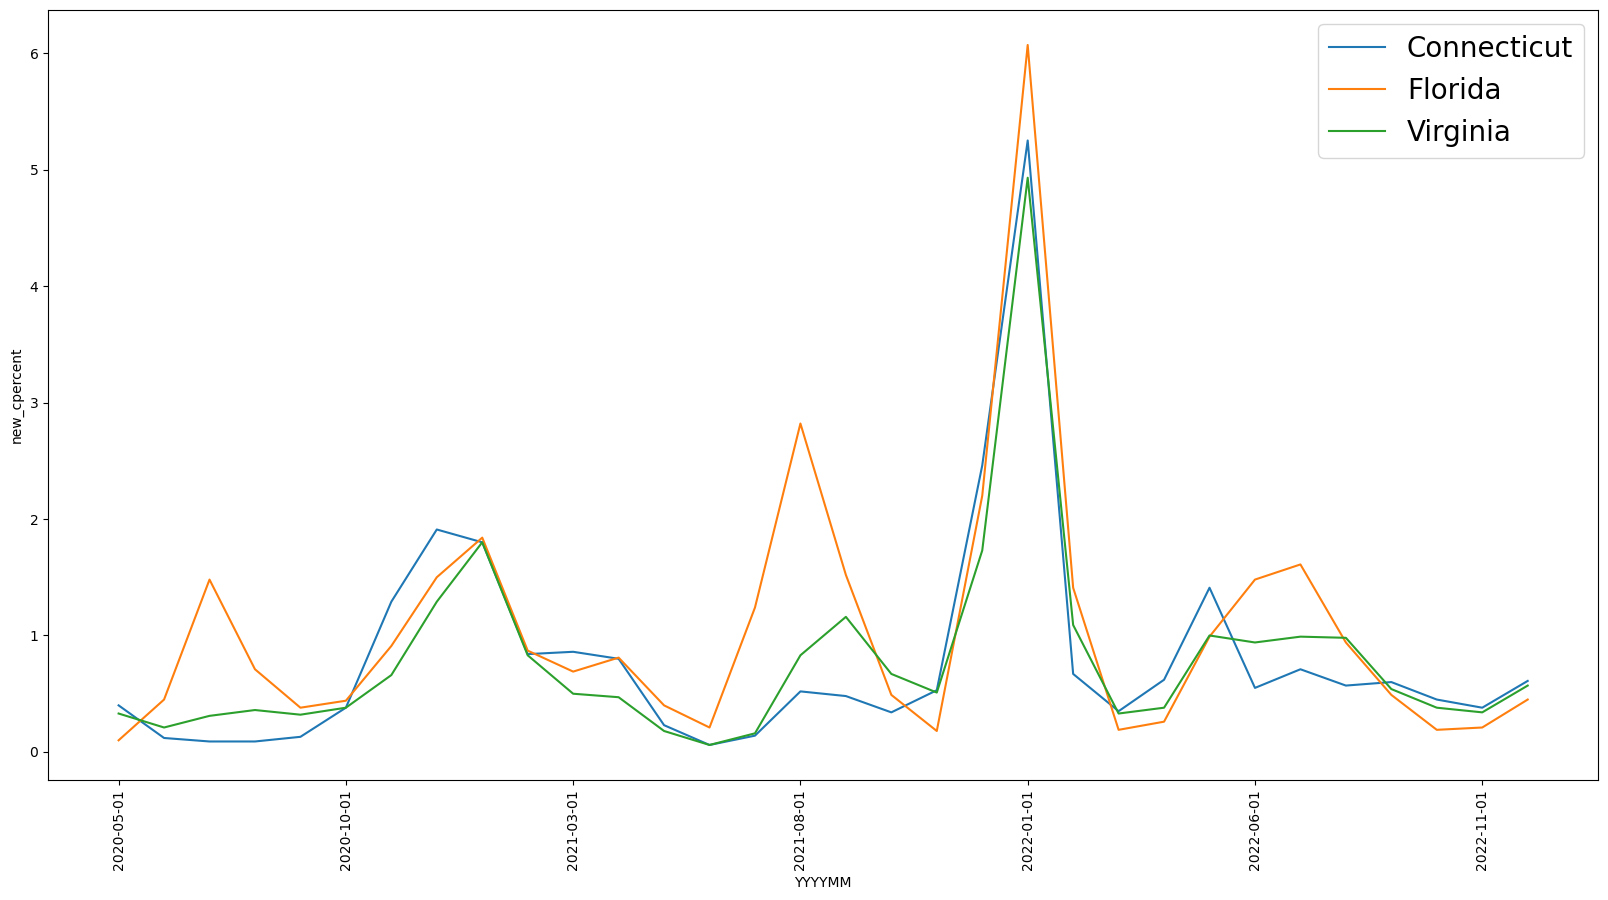

In [245]:
# Show new_ccpercent for all states across time
# https://stackoverflow.com/questions/40071096/how-to-plot-multiple-lines-in-one-figure-in-pandas-python-based-on-data-from-mul
wanted = ['Florida','New York', 'Connecticut','Virginia', 'California', 'Texas']
wanted2 = ['Florida','Connecticut','Virginia']
(State_sum[State_sum['State'].isin(wanted2)].groupby("State")['new_cpercent']
         .plot(legend=True, xlabel="YYYYMM", ylabel="new_cpercent", rot=90, figsize=(20, 10)))
plt.legend(fontsize="20", loc ="upper right")

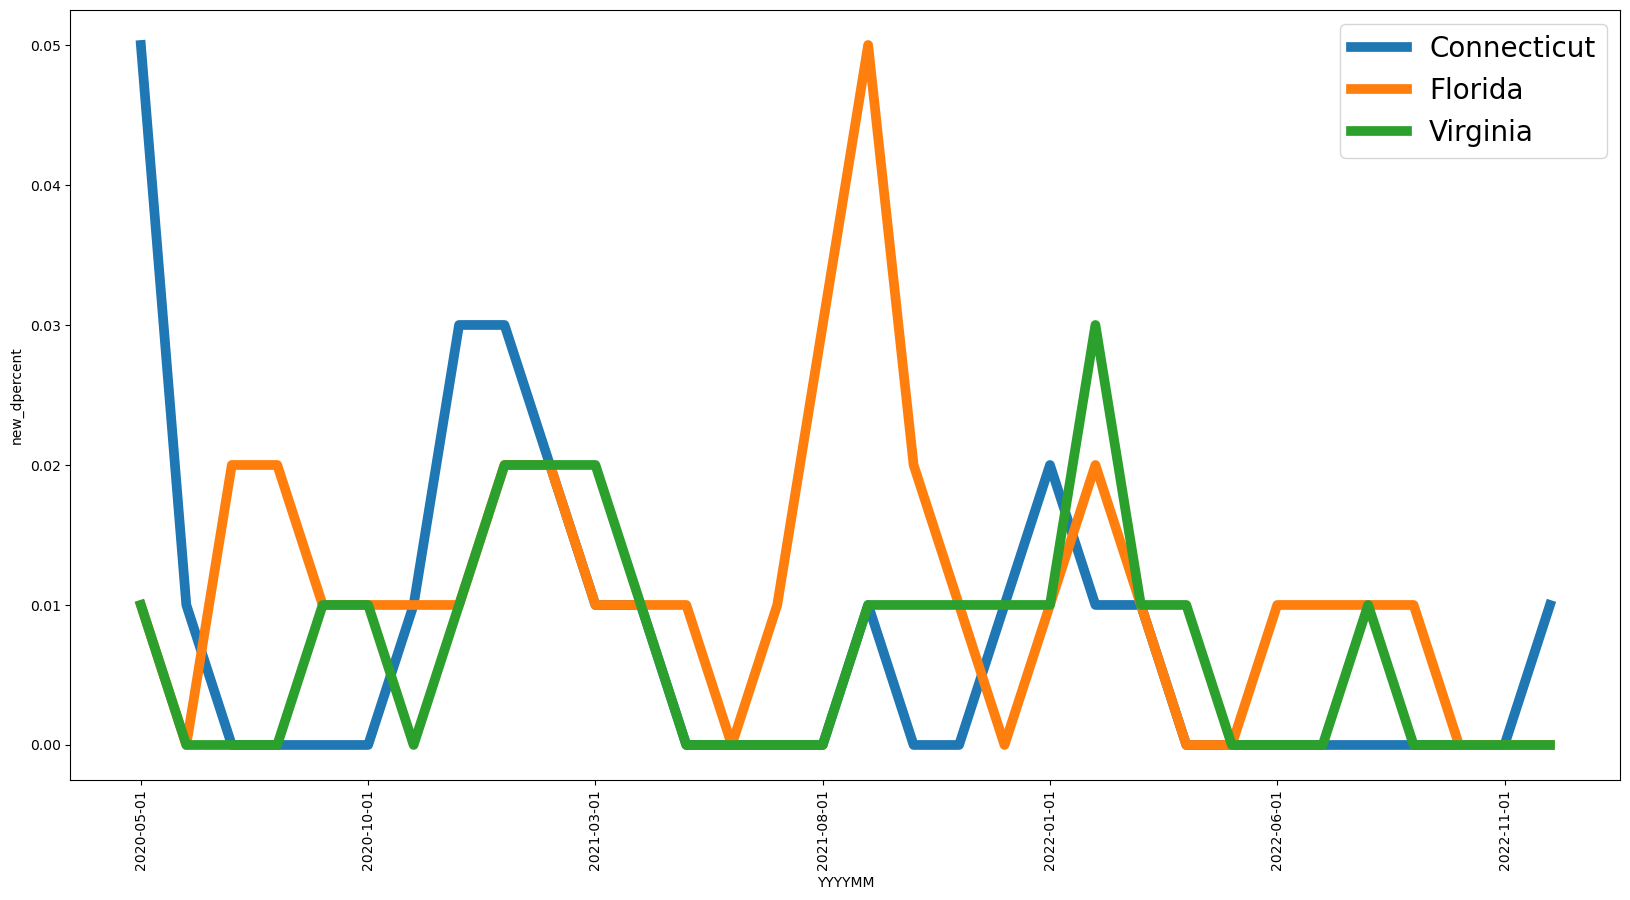

In [243]:
(State_sum[State_sum['State'].isin(wanted)].groupby("State")['new_dpercent']
         .plot(legend=True, xlabel="YYYYMM", ylabel="new_dpercent", rot=90, 
               figsize=(20, 10),linewidth=7))
plt.legend(fontsize="20", loc ="upper right")

In [ ]:
# not used
sql1 = path = '''SELECT distinct RegionName FROM Covid_subnat_df
                 WHERE CountryCode = 'USA';'''
state_rows = sqldf(sql1).values.tolist()
state_list = [x for row in state_rows for x in row if x is not None]

In [17]:
def get_count(State):
    IN_STATE = State
    sql1 = '''SELECT count(*) FROM Covid_subnat_df
                     WHERE CountryCode = 'USA' 
                     AND RegionName = '{}';'''.format(State)
    
    #print(sql1)
    state_count = sqldf(sql1).values[0][0]
    return state_count



for index, state in enumerate(state_list):
    state_count = get_count(state)
    print(index,state, state_count)

0 Alaska [[1096]]
1 Alabama [[1096]]
2 Arkansas [[1096]]
3 Arizona [[1096]]
4 California [[1096]]
5 Colorado [[1096]]
6 Connecticut [[1096]]
7 Washington DC [[1096]]
8 Delaware [[1096]]
9 Florida [[1096]]
10 Georgia [[1096]]
11 Hawaii [[1096]]
12 Iowa [[1096]]
13 Idaho [[1096]]
14 Illinois [[1096]]
15 Indiana [[1096]]
16 Kansas [[1096]]
17 Kentucky [[1096]]
18 Louisiana [[1096]]
19 Massachusetts [[1096]]
20 Maryland [[1096]]
21 Maine [[1096]]
22 Michigan [[1096]]
23 Minnesota [[1096]]
24 Missouri [[1096]]
25 Mississippi [[1096]]
26 Montana [[1096]]
27 North Carolina [[1096]]
28 North Dakota [[1096]]
29 Nebraska [[1096]]
30 New Hampshire [[1096]]
31 New Jersey [[1096]]
32 New Mexico [[1096]]
33 Nevada [[1096]]
34 New York [[1096]]
35 Ohio [[1096]]
36 Oklahoma [[1096]]
37 Oregon [[1096]]
38 Pennsylvania [[1096]]
39 Rhode Island [[1096]]
40 South Carolina [[1096]]
41 South Dakota [[1096]]
42 Tennessee [[1096]]
43 Texas [[1096]]
44 Utah [[1096]]
45 Virginia [[1096]]
46 Vermont [[1096]]
47 